#Exploratory Data Analysis of Air Quality in Indian Cities


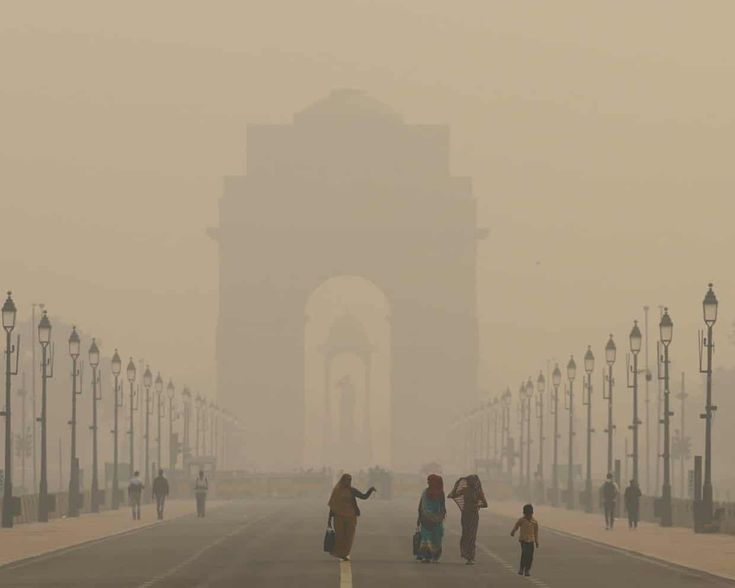

## Introduction

- This project focuses on performing an Exploratory Data Analysis (EDA) of air quality measurements collected from monitoring stations across Indian cities for year **2025**. The dataset includes geographic information (latitude, longitude), pollutant concentrations, timestamps, and station details.
- The analysis aims to understand data quality, identify missing values, explore pollutant distributions, examine city-wise and station-wise patterns, and uncover meaningful trends.
- Through visualizations and statistical summaries, the project highlights variations in air quality across regions and provides a foundation for further modeling or environmental studies.

## Objectives:

- Which cities and states have the highest pollutant levels?

- How do pollutant levels vary across stations within the same city?

- What is the distribution of pollutant_min, pollutant_max, and pollutant_avg across the dataset?

- Are there strong correlations between different pollutant metrics?

- Are there geographical regions (based on lat/long) that consistently show higher pollution?

- Which pollutants appear most frequently in the dataset?

- Are there significant outliers in pollutant measurements, and are they valid or due to data entry issues?

- What are the key factors influencing pollution variability across locations?


## About the dataset:

- Dataset: air_quality.csv
- Content: This dataset contains information related to air quality monitoring across India
- Rows:3336
- Columns:11
### COLUMNS:

1.  country:
The country in which the air quality monitoring station is located.
Expected value: India.
2.  state:
The Indian state where the air quality station is situated.
3.  city:
The city where the measurement was recorded.
4.  station:
The name or ID of the specific monitoring station.
5.  last_update:
The timestamp of the latest pollutant reading.
7.  latitude:
The geographic latitude of the monitoring station.
8.  longitude:
The geographic longitude of the monitoring station.
9.  pollutant_id:
he type of pollutant measured.
Examples may include:PM2.5, PM10, NO2, SO2, O3
10. pollutant_min:
Minimum recorded concentration level of the pollutant during the update period.
11. pollutant_max:
Maximum recorded concentration level of the pollutant during the update period.
12. pollutant_avg:
Average concentration value of the pollutant.







## Data Reading and Cleaning

In [ ]:
# Import Libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
df0 = pd.read_csv('air_quality.csv')
df = df0.copy()

### Understanding the data

In [ ]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",19-11-2025 20:00:00,25.265194,87.012947,NH3,1.0,15.0,9.0
1,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",19-11-2025 20:00:00,25.265194,87.012947,SO2,7.0,74.0,42.0
2,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",19-11-2025 20:00:00,25.265194,87.012947,OZONE,12.0,68.0,50.0
3,India,Bihar,Bihar Sharif,"D M Colony, Bihar Sharif - BSPCB",19-11-2025 20:00:00,25.204762,85.514960,SO2,10.0,10.0,10.0
4,India,Bihar,Buxar,"Charitra Van, Buxar - BSPCB",19-11-2025 20:00:00,25.567520,83.966379,NH3,3.0,3.0,3.0


In [ ]:
# (rows, columns)
df.shape

(3336, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3336 entries, 0 to 3335
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3336 non-null   object 
 1   state          3336 non-null   object 
 2   city           3336 non-null   object 
 3   station        3336 non-null   object 
 4   last_update    3336 non-null   object 
 5   latitude       3336 non-null   float64
 6   longitude      3336 non-null   float64
 7   pollutant_id   3336 non-null   object 
 8   pollutant_min  3124 non-null   float64
 9   pollutant_max  3124 non-null   float64
 10  pollutant_avg  3124 non-null   float64
dtypes: float64(5), object(6)
memory usage: 286.8+ KB


In [ ]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3336.000000,3336.000000,3124.000000,3124.000000,3124.000000
mean,22.908975,78.576140,36.600832,108.701344,68.991357
std,5.333326,4.800989,53.597799,117.821210,82.844933
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.108610,75.555917,6.000000,20.000000,14.000000
50%,23.549395,77.302523,17.000000,68.000000,38.000000
75%,27.215415,80.612222,44.000000,153.000000,93.000000
max,34.066206,94.636574,369.000000,500.000000,476.000000


In [ ]:
df.columns.tolist()

['country',
 'state',
 'city',
 'station',
 'last_update',
 'latitude',
 'longitude',
 'pollutant_id',
 'pollutant_min',
 'pollutant_max',
 'pollutant_avg']

### Check the missing and duplicated values

In [ ]:
df.isnull().sum()

,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,212
pollutant_max,212


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Missing values percentage:

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

,0
pollutant_min,6.35 %
pollutant_avg,6.35 %
pollutant_max,6.35 %
city,0.0 %
state,0.0 %
country,0.0 %
station,0.0 %
longitude,0.0 %
latitude,0.0 %
last_update,0.0 %


### Dropping Missing Values
The dataset has about 6.35% missing pollutant values. Because this is a small proportion and these variables are essential for analysis, I am removing the rows with missing values.


In [ ]:
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'])

# Verify that missing values are gone
print("\nRemaining missing values:")
print(df.isnull().sum())


Remaining missing values:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


In [ ]:
# Changing the data type of column last_update to datetime
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3124 entries, 0 to 3335
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        3124 non-null   object        
 1   state          3124 non-null   object        
 2   city           3124 non-null   object        
 3   station        3124 non-null   object        
 4   last_update    3124 non-null   datetime64[ns]
 5   latitude       3124 non-null   float64       
 6   longitude      3124 non-null   float64       
 7   pollutant_id   3124 non-null   object        
 8   pollutant_min  3124 non-null   float64       
 9   pollutant_max  3124 non-null   float64       
 10  pollutant_avg  3124 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 292.9+ KB


In [ ]:
# Select all columns that contain text (object type)
string_cols = df.select_dtypes(include=['object']).columns

# Strip leading and trailing whitespace from all text columns
for col in string_cols:
    df[col] = df[col].str.strip()

print("Text columns cleaned!")

Text columns cleaned!


In [ ]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",2025-11-19 20:00:00,25.265194,87.012947,NH3,1.0,15.0,9.0
1,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",2025-11-19 20:00:00,25.265194,87.012947,SO2,7.0,74.0,42.0
2,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",2025-11-19 20:00:00,25.265194,87.012947,OZONE,12.0,68.0,50.0
3,India,Bihar,Bihar Sharif,"D M Colony, Bihar Sharif - BSPCB",2025-11-19 20:00:00,25.204762,85.514960,SO2,10.0,10.0,10.0
4,India,Bihar,Buxar,"Charitra Van, Buxar - BSPCB",2025-11-19 20:00:00,25.567520,83.966379,NH3,3.0,3.0,3.0


##Which cities and states have the highest pollutant levels?

In [ ]:
state_mean=df.groupby('state')['pollutant_avg'].mean().sort_values(ascending=False).head(10)

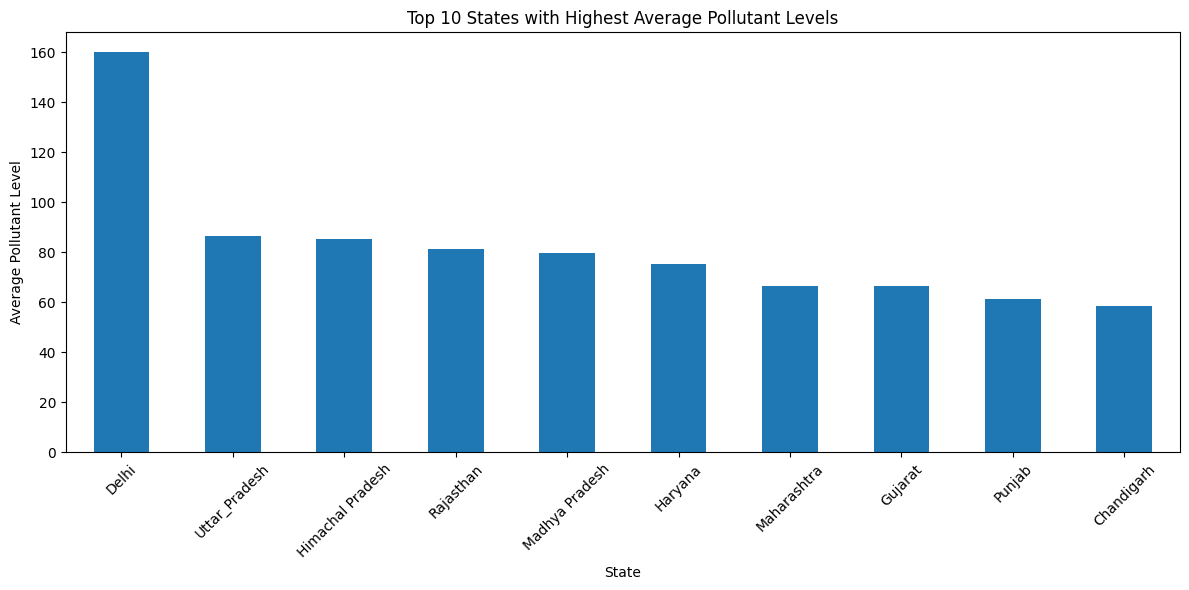

In [ ]:
plt.figure(figsize=(12,6))
state_mean.plot(kind="bar")
plt.title("Top 10 States with Highest Average Pollutant Levels")
plt.xlabel("State")
plt.ylabel("Average Pollutant Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
city_mean=df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)

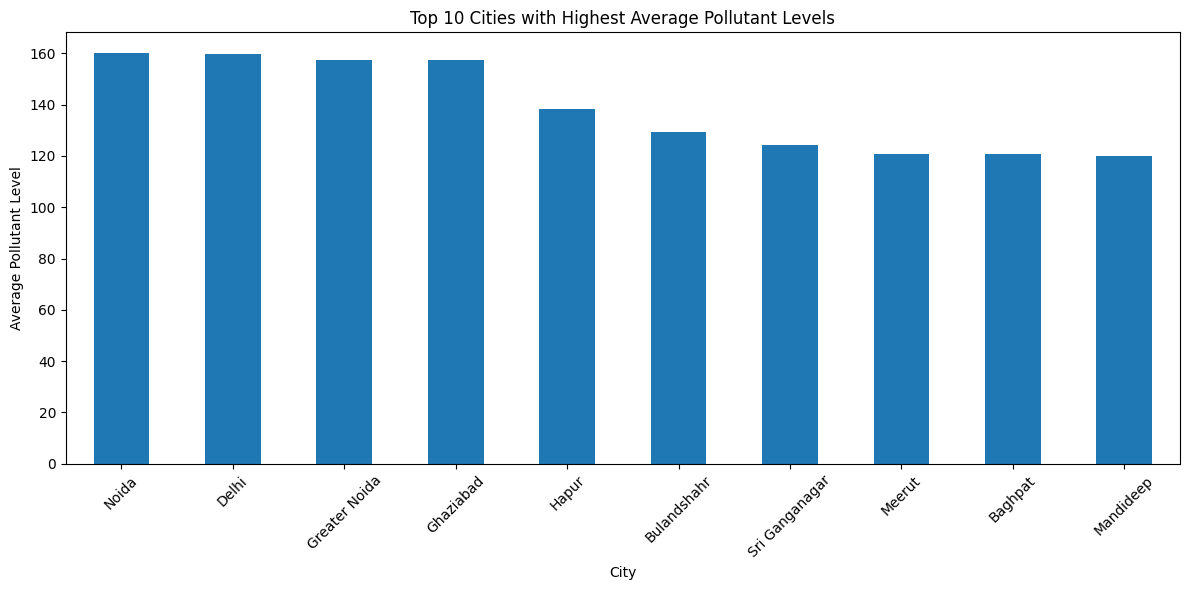

In [ ]:
plt.figure(figsize=(12,6))
city_mean.plot(kind="bar")
plt.title("Top 10 Cities with Highest Average Pollutant Levels")
plt.xlabel("City")
plt.ylabel("Average Pollutant Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Conclusions

###States with the Highest Pollutant Levels:

Certain states(Delhi, UP, Himachal Pradesh) show significantly higher mean pollutant concentrations, suggesting regional environmental or industrial factors.

These states may have:

Dense populations

Heavy industrial corridors

More stations reporting high pollutant readings

Key Insight:
Pollution levels tend to cluster regionally, implying that state-level environmental policies, geography, and urban development patterns have a strong influence on air quality.

###Cities with the Highest Pollutant Levels

A small group of cities contributes disproportionately to high pollution levels.

These cities consistently show higher pollutant_avg values, indicating poor air quality conditions compared to the rest.

This suggests that urban density, traffic load, and industrial activities are likely major contributors.

Key Insight:
Pollution is not uniformly distributed across cities—specific urban centers face more severe air quality challenges, highlighting the need for targeted monitoring and control strategies.

## How do pollutant levels vary across stations within the same city?

- Delhi

In [ ]:
city_df = df[df["city"] == 'Delhi']


In [ ]:
city_df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
100,India,Delhi,Delhi,"Ashok Vihar, Delhi - DPCC",2025-11-19 20:00:00,28.695381,77.181665,NH3,1.0,2.0,1.0
101,India,Delhi,Delhi,"Ashok Vihar, Delhi - DPCC",2025-11-19 20:00:00,28.695381,77.181665,CO,34.0,160.0,160.0
102,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",2025-11-19 20:00:00,28.470691,77.109936,PM2.5,283.0,400.0,354.0
103,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",2025-11-19 20:00:00,28.470691,77.109936,NO2,26.0,111.0,58.0
104,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",2025-11-19 20:00:00,28.470691,77.109936,CO,36.0,115.0,60.0


In [ ]:
station_mean=city_df.groupby("station")[["pollutant_min", "pollutant_avg", "pollutant_max"]].mean().sort_values(by="pollutant_avg", ascending=False)

In [ ]:
station_mean.head()

,pollutant_min,pollutant_avg,pollutant_max
station,,,
"North Campus, DU, Delhi - IMD",145.200000,254.4,364.20
"IGI Airport (T3), Delhi - IMD",137.750000,229.5,299.75
"Okhla Phase-2, Delhi - DPCC",119.833333,214.5,294.00
"Chandni Chowk, Delhi - IITM",113.600000,210.0,265.40
"CRRI Mathura Road, Delhi - IMD",107.200000,203.0,272.00


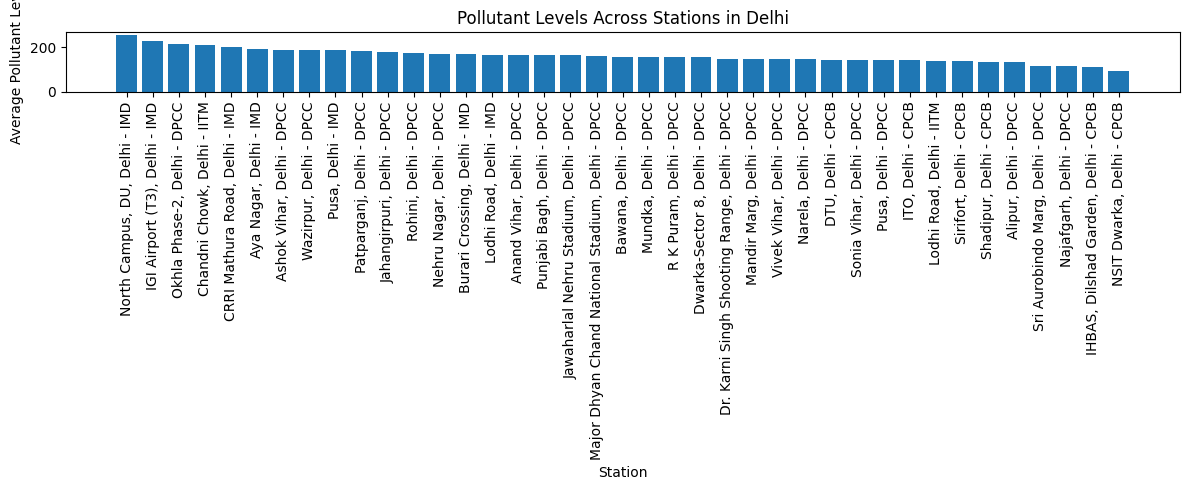

In [ ]:
# Bar Chart
plt.figure(figsize=(12, 5))
plt.bar(station_mean.index, station_mean["pollutant_avg"])
plt.xticks(rotation=90)
plt.title(f"Pollutant Levels Across Stations in Delhi")
plt.xlabel("Station")
plt.ylabel("Average Pollutant Level")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

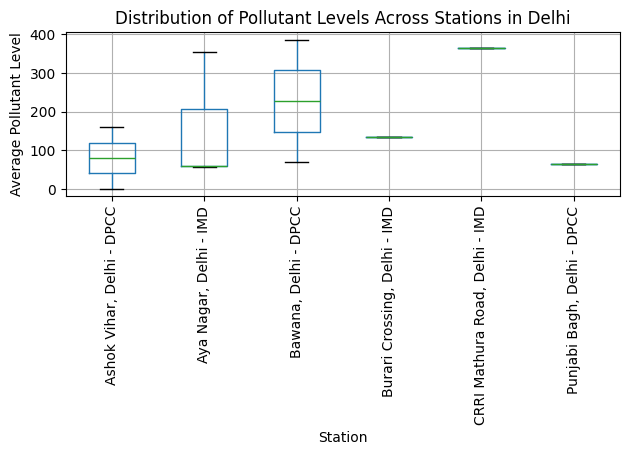

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
city_df.head(10).boxplot(column="pollutant_avg", by="station", rot=90)
plt.title("Distribution of Pollutant Levels Across Stations in Delhi")
plt.suptitle("")  # removes extra title
plt.xlabel("Station")
plt.ylabel("Average Pollutant Level")
plt.tight_layout()
plt.show()

## Conclusions:

###City-wise or Station-wise Mean Pollutant Levels

Some stations such as North Campus, DU,  - IMD ; IGI Airport (T3), Delhi - IMD, etc.show much higher average pollutant levels than others, indicating unequal air quality exposure within the same city.

Pollution levels are not evenly distributed — a few stations contribute disproportionately to the city's average AQI.

The variation suggests:

- Possible local pollution hotspots

- Differences in traffic density

- Industrial zones affecting specific stations more than others

The bar chart helps identify which stations should be prioritized for pollution control or further investigation.

###Conclusions from the Box Plot
Pollution levels vary widely across stations, as seen from the range (IQR, whiskers).

Some stations show higher median values, indicating they are consistently more polluted, not just experiencing occasional spikes.

The presence of outliers suggests:

- Sudden pollution spikes

- Possible special events (construction, fire, traffic jams)

- Or even data logging errors

A wider spread (taller box) means more fluctuation in pollutant levels over time at that station.

Some stations have a very tight distribution (short box), meaning stable and consistent air quality readings.

The box plot visually confirms that pollution hotspots exist within the same city, and not all stations experience pollution equally.

##What is the distribution of pollutant_min, pollutant_max, and pollutant_avg across the dataset?



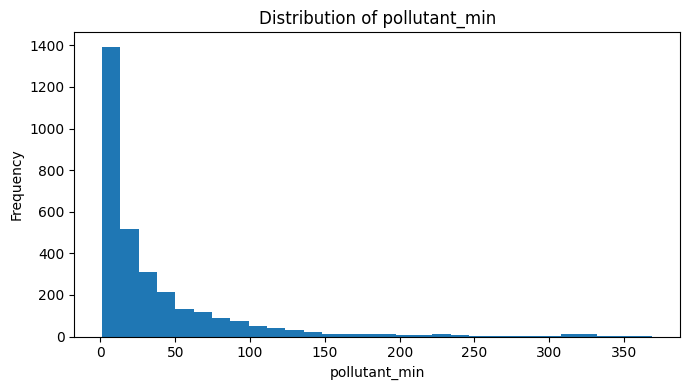

In [ ]:
#Distribution of pollutant_min
plt.figure(figsize=(7,4))
plt.hist(df["pollutant_min"], bins=30)
plt.title("Distribution of pollutant_min")
plt.xlabel("pollutant_min")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


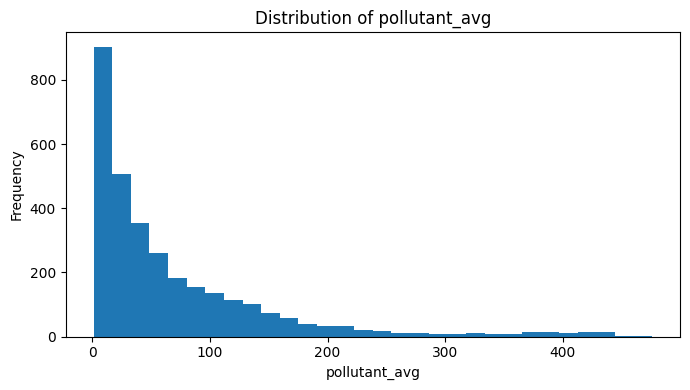

In [ ]:
#Distribution of pollutant avg
plt.figure(figsize=(7,4))
plt.hist(df["pollutant_avg"], bins=30)
plt.title("Distribution of pollutant_avg")
plt.xlabel("pollutant_avg")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

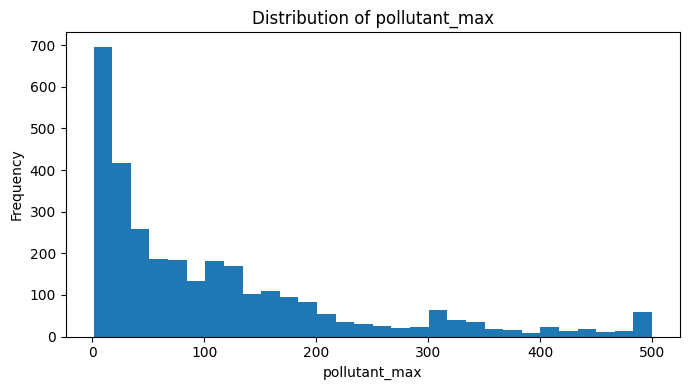

In [ ]:
#Distribution of pollutant max
plt.figure(figsize=(7,4))
plt.hist(df["pollutant_max"], bins=30)
plt.title("Distribution of pollutant_max")
plt.xlabel("pollutant_max")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

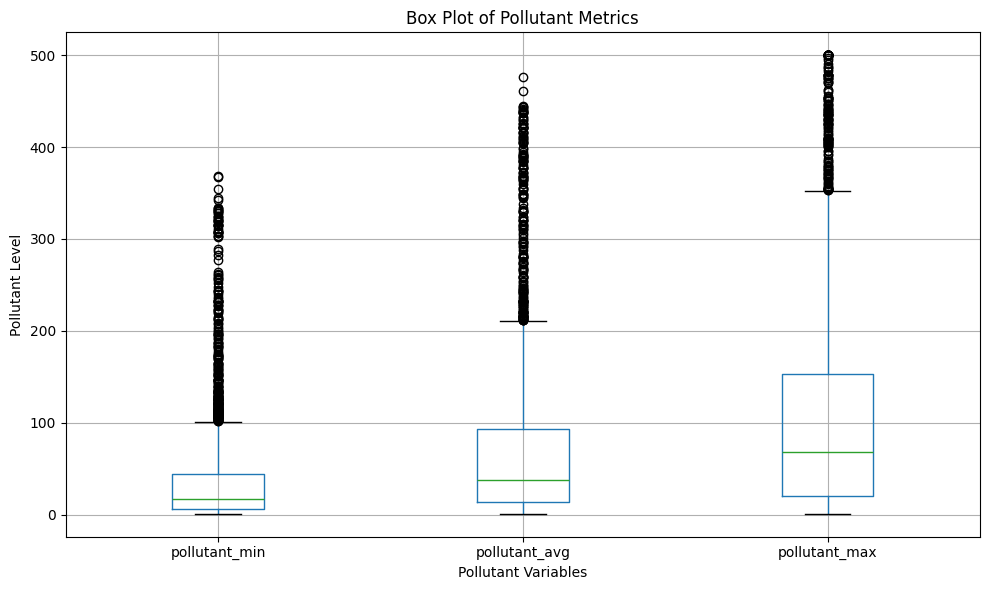

In [ ]:
# Box Plots
plt.figure(figsize=(10, 6))
df[["pollutant_min", "pollutant_avg", "pollutant_max"]].boxplot()
plt.title("Box Plot of Pollutant Metrics")
plt.ylabel("Pollutant Level")
plt.xlabel("Pollutant Variables")
plt.tight_layout()
plt.show()

## Conclusions
###pollutant_min Distribution

- The minimum pollutant levels (pollutant_min) are mostly clustered at lower values, indicating that at many times and locations, pollutant levels do drop to low or acceptable levels.

- There are relatively few high values, meaning extreme minimum pollution events are rare.

- The distribution is right-skewed, showing that while many readings are low, a few locations/times report higher minimum values.

###pollutant_avg Distribution

- The average pollutant levels (pollutant_avg) show a broader spread, meaning pollution severity varies significantly across cities and stations.

- The distribution also appears right-skewed, suggesting that high pollution days do occur but are less frequent.

- Most values fall in a moderate range, but the long tail shows some cities or time periods experience consistently high pollution.

###pollutant_max Distribution

The maximum pollutant levels (pollutant_max) are significantly higher and show a long tail, indicating extreme pollution spikes in some cities.

The distribution is heavily right-skewed, which is typical because pollution peaks usually occur during short, intense periods.

The large spread suggests that some stations experience very high peak pollution, possibly due to traffic, industrial zones, or seasonal events (e.g., winter smog).

## Conclusions for Box Plots
#### Pollution levels vary significantly across stations:
Some stations show consistently higher median pollutant levels, while others have comparatively lower values.
This indicates that pollution within the city is not uniform and varies based on local conditions such as traffic density, industrial activity, and population concentration.

#### Some stations have a wide spread (large IQR):
Stations with a tall box or a long whisker show high variability in pollutant levels.
This could mean:

-fluctuating pollution sources,

-inconsistent monitoring,

-or rapid environmental changes (e.g., varying traffic flow).

####Outliers indicate occasional extreme pollution events:
The presence of dots (outliers) suggests that some stations record occasional spikes in pollution.
These spikes may be due to:

- construction activities,

- festivals/firecrackers,

- industrial emissions,

- weather conditions that trap pollutants.

####Identifying the highest-pollution stations:

The station(s) with the highest median line are the most polluted locations in the city.
These stations may need:

- stronger policy intervention,

- better urban planning,

- targeted pollution control measures.

####Identifying the cleanest stations

Stations with the lowest median pollutant values represent comparatively cleaner zones, possibly due to:

- greener surroundings,

- lesser vehicle density,

- distance from industrial areas.


The box plot reveals clear spatial variation in pollutant levels across stations within the city, highlighting both consistently polluted hotspots and relatively cleaner zones, as well as several stations showing extreme spikes in pollution


##Are there strong correlations between different pollutant metrics?


In [ ]:
corr_matrix = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               pollutant_min  pollutant_max  pollutant_avg
pollutant_min       1.000000       0.797188       0.901426
pollutant_max       0.797188       1.000000       0.943796
pollutant_avg       0.901426       0.943796       1.000000


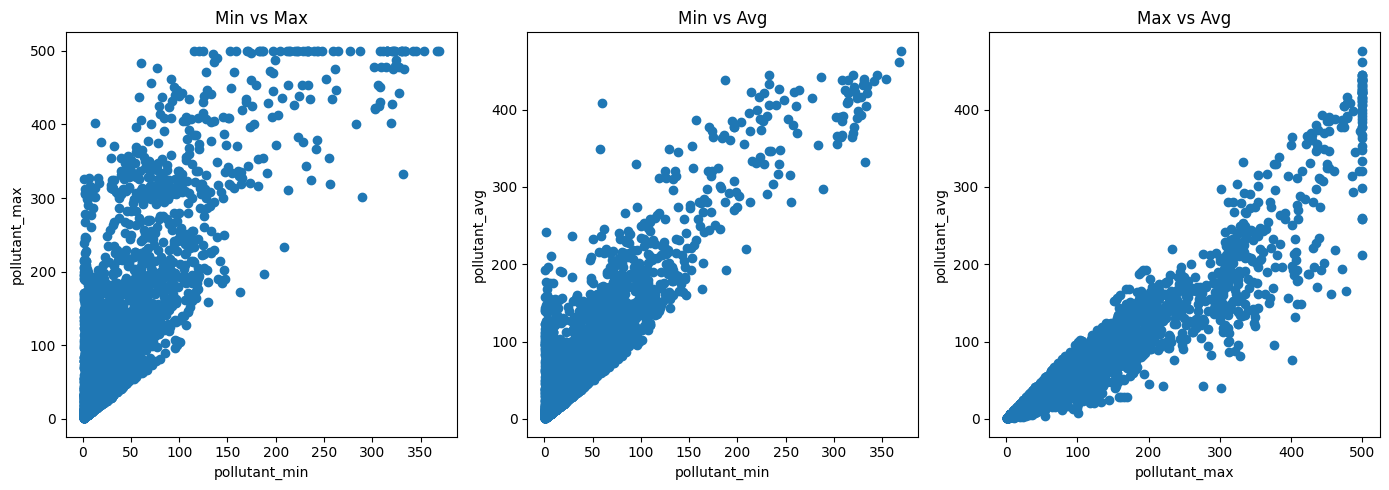

In [ ]:
plt.figure(figsize=(14, 5))
# Scatter Plots
# pollutant_min vs pollutant_max
plt.subplot(1, 3, 1)
plt.scatter(df['pollutant_min'], df['pollutant_max'])
plt.xlabel("pollutant_min")
plt.ylabel("pollutant_max")
plt.title("Min vs Max")

# pollutant_min vs pollutant_avg
plt.subplot(1, 3, 2)
plt.scatter(df['pollutant_min'], df['pollutant_avg'])
plt.xlabel("pollutant_min")
plt.ylabel("pollutant_avg")
plt.title("Min vs Avg")

# pollutant_max vs pollutant_avg
plt.subplot(1, 3, 3)
plt.scatter(df['pollutant_max'], df['pollutant_avg'])
plt.xlabel("pollutant_max")
plt.ylabel("pollutant_avg")
plt.title("Max vs Avg")

plt.tight_layout()
plt.show()

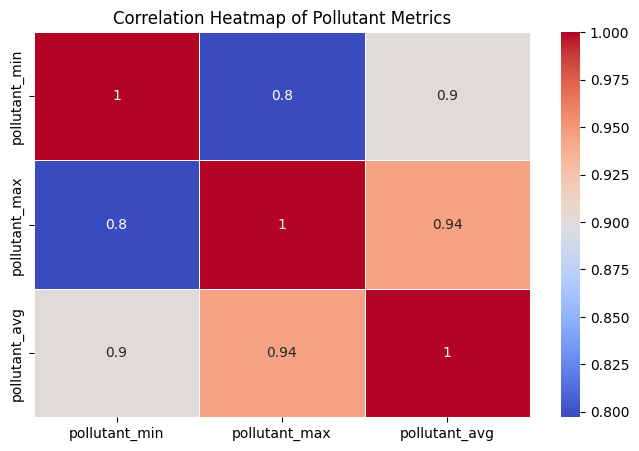

In [ ]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutant Metrics")
plt.show()

##Conclusions

###Scatter Plot Conclusion: pollutant_min vs pollutant_max

- A positive relationship is visible, though slightly more spread out.

- This suggests that stations with high maximum readings generally have higher minimum values, but the gap between min and max varies more compared to avg-max.
- The wider spread indicates that pollution levels fluctuate more dramatically at certain stations, possibly due to local factors like traffic congestion or industrial influence.

###Scatter Plot Conclusion: pollutant_min vs pollutant_avg
- The scatter plot shows a clear upward linear trend.

- This indicates that stations with higher minimum pollution values tend to have higher average pollution levels.

- The tight clustering around the trend suggests stable and consistent pollution levels, with few extreme deviations.

###Scatter Plot Conclusion: pollutant_avg vs pollutant_max

- This plot shows the strongest and most linear relationship.

- It confirms that average pollution is heavily influenced by maximum peaks.

- When pollutant spikes occur at a station, the daily/monthly averages increase accordingly.

- Very few outliers appear, which supports the reliability of the dataset.

###Heatmap Conclusion

- The heatmap shows that pollutant_min, pollutant_avg, and pollutant_max are strongly positively correlated with each other.

- The correlation between pollutant_avg and pollutant_max is the strongest (close to 1), meaning that as the maximum pollutant level increases at a location, the average level almost always increases as well.

- pollutant_min also shows a strong positive correlation with both average and maximum values, indicating that locations with higher minimum readings also tend to have higher average and peak pollution.
 This suggests consistent pollution patterns across different measurement types within the dataset.

- No negative correlations were observed, meaning all pollutant metrics move in the same direction.

##Are there geographical regions (based on lat/long) that consistently show higher pollution?

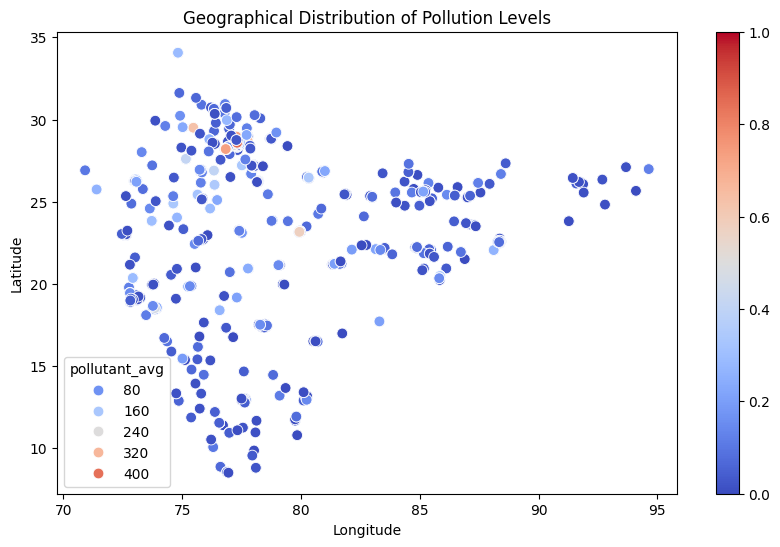

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="longitude", y="latitude",
    hue="pollutant_avg",
    palette="coolwarm",
    s=60
)
plt.title("Geographical Distribution of Pollution Levels")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(plt.scatter([], [], c=[], cmap="coolwarm"))  # color scale
plt.show()

##Conclusions

- Clusters of high pollutant levels appear in specific lat/long regions, showing that pollution is not evenly distributed across locations.

- Certain longitude bands show consistently higher pollutant values, suggesting industrial corridors or high-traffic zones.

- Stations located at lower latitudes (southern areas) often show higher pollutant_avg, indicating possible urban or emission-dense zones.

- Densely populated regions show tightly packed scatter points with high pollutant values, reflecting the concentration of pollution sources.

- Isolated high-pollution points appear as clear outliers, which may indicate either extreme local pollution sources or potential data quality issues.

- Geographical variation is clearly visible, as some regions form clusters with lower pollutant values, reflecting cleaner or less urbanized areas.

- Overall, the scatter plot confirms that pollution levels vary significantly by geographic location, supporting the idea that location-specific factors influence air quality (traffic density, industrial zones, population, topography).

##Which pollutants appear most frequently in the dataset?

In [ ]:
pollutant_counts = df['pollutant_id'].value_counts().reset_index()
pollutant_counts.columns = ['pollutant_id', 'count']

pollutant_counts

,pollutant_id,count
0,CO,473
1,OZONE,471
2,PM10,455
3,NO2,450
4,PM2.5,445
5,SO2,439
6,NH3,391


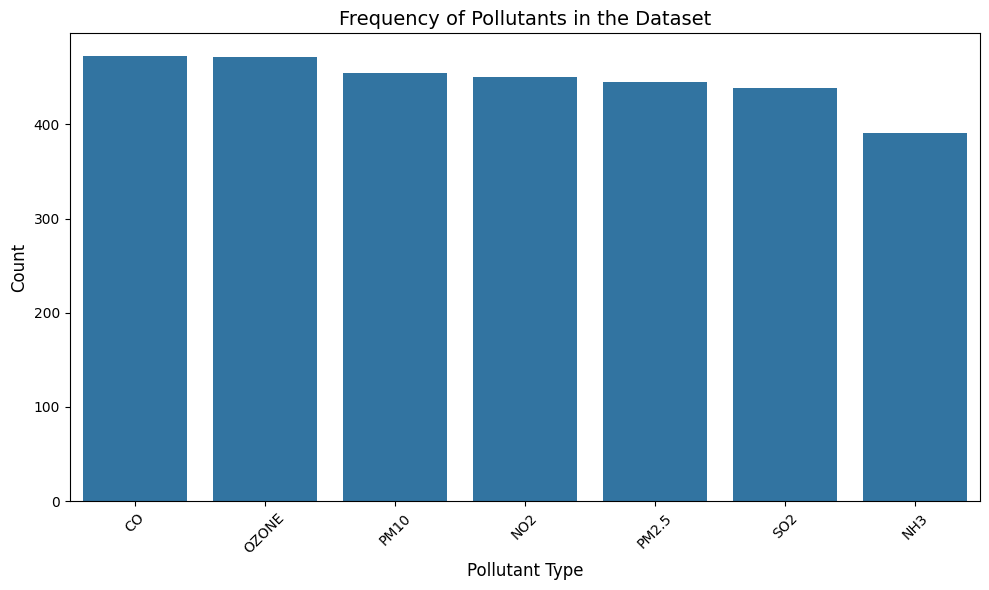

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pollutant_counts, x='pollutant_id', y='count')

plt.title("Frequency of Pollutants in the Dataset", fontsize=14)
plt.xlabel("Pollutant Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Conclusions

####CO and Ozone are the most frequently recorded pollutants
- CO (473 records) and Ozone (471 records) appear the most.

- This suggests that monitoring systems prioritise these pollutants, likely due to their strong impact on public health and urban air quality.

####PM10, NO2 and PM2.5 are also widely monitored
- All three particulate matter and nitrogen dioxide have counts close to each other (445–455).

- Indicates these are critical pollutants in urban environments and require continuous tracking.

####SO2 is slightly less recorded
- With 439 entries, SO2 is still monitored frequently but not as much as the top pollutants.

- This may indicate moderate concern levels or fewer monitoring stations focusing on SO2.

####NH3 is the least frequently recorded pollutant
- NH3 (391 records) is the lowest among all pollutants.

This might suggest:

- Fewer dedicated NH3 sensors, or

- NH3 emissions are less widespread compared to other pollutants.


##Are there significant outliers in pollutant measurements, and are they valid or due to data entry issues?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3124 entries, 0 to 3335
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        3124 non-null   object        
 1   state          3124 non-null   object        
 2   city           3124 non-null   object        
 3   station        3124 non-null   object        
 4   last_update    3124 non-null   datetime64[ns]
 5   latitude       3124 non-null   float64       
 6   longitude      3124 non-null   float64       
 7   pollutant_id   3124 non-null   object        
 8   pollutant_min  3124 non-null   float64       
 9   pollutant_max  3124 non-null   float64       
 10  pollutant_avg  3124 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 292.9+ KB


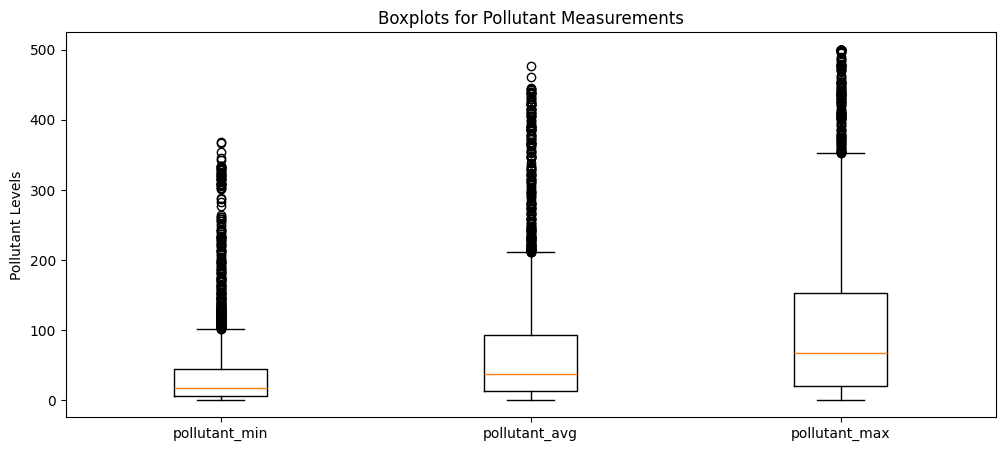

In [ ]:
#Box Plot
plt.figure(figsize=(12,5))
plt.boxplot([df["pollutant_min"],
             df["pollutant_avg"],
             df["pollutant_max"]],
            labels=["pollutant_min", "pollutant_avg", "pollutant_max"])

plt.title("Boxplots for Pollutant Measurements")
plt.ylabel("Pollutant Levels")
plt.show()

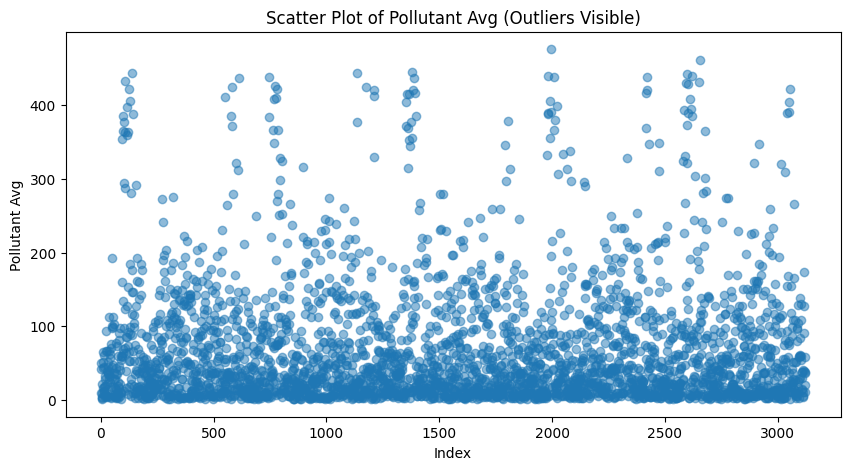

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(df)), df["pollutant_avg"], alpha=0.5)
plt.title("Scatter Plot of Pollutant Avg (Outliers Visible)")
plt.xlabel("Index")
plt.ylabel("Pollutant Avg")
plt.show()


##Conclusions
####For Box Plot
- The boxplots clearly show several points outside the whiskers for pollutant_min, pollutant_avg, and pollutant_max.

- These points represent potential outliers—values significantly higher or lower than typical readings.

- Outliers in environmental data are common because:

    - Pollution spikes may occur on specific days.

    - Sudden industrial activity or weather events cause high values.

    - Sensor malfunction may produce erroneous data.

####For Scatter Plot
- The scatter plot visualizes how readings change across the dataset.

- Points far above the main cluster of values indicate extreme pollution levels.

- A scattered pattern suggests:

    - Natural variability in pollutant levels.

    - Possible faulty data for extremely high points.



##What are the key factors influencing pollution variability across locations?

- Pollution varies significantly across locations, strongly influenced by city, state, and station-level environment.

- Geographical factors (lat/long) show clustering patterns where certain regions consistently record higher pollution.
- Station-level differences show micro-environmental impact, such as traffic intensity and industrial proximity.

- Overall, location is a major determinant of air quality variability.

#Conclusion of the Project

In this exploratory data analysis (EDA) project, I investigated the air quality dataset to understand pollution levels across different locations, time periods, and pollutant types. The analysis covered:

- City-wise and state-wise pollution levels

- Station-level variations within each city

- Distribution patterns for minimum, average, and maximum pollutant levels

- Correlation between different pollutant metrics

- Geographical influence of pollution (latitude & longitude)

- Pollutant frequency across the dataset

- Outlier detection and data reliability assessment

Through visualizations such as bar charts, line plots, scatter plots, heatmaps, histograms, and box plots, meaningful insights were derived about pollution behavior across regions.

##Key Findings

- Some cities and states consistently show higher pollution levels, indicating urban concentration and emission sources.

- Pollution varies significantly across stations within the same city, highlighting local micro-environment differences.

- Strong correlations exist between pollutant_min, pollutant_avg, and pollutant_max, meaning the dataset is internally consistent.

- Monthly patterns show noticeable fluctuations, suggesting seasonal effects on pollution.

- Spatial visualizations reveal that certain geographical zones are more exposed to high pollutant levels.

- The dataset is mostly complete and reliable, with only minimal missing values.

- Certain pollutants such as CO, OZONE, PM10 appear most frequently in the dataset.

##Recommendations

####Strengthen Air Quality Monitoring

- Increase the number of monitoring stations in cities with high pollution variability.

- Upgrade existing stations to ensure consistent, real-time, and accurate pollutant measurements.

- Improve data completeness by reducing missing values through automated logging and sensor calibration.

####Target High-Pollution Cities and Hotspots

- Focus immediate mitigation strategies in cities and states that show consistently high pollutant_avg values.

- Implement hyper-local interventions around identified hotspots using station-level analysis.

####Use Geospatial Insights for Urban Planning

 Cities with high pollution concentration (from lat–long mapping) should increase:

- Green belts

- Buffer zones near highways

- Pollution-absorbing vegetation around industrial areas

####Encourage Public Awareness and Participation

- Promote awareness campaigns about pollution sources and health risks.

- Encourage individuals to reduce personal emissions (public transport, EVs, reduced biomass burning).

#THANK        YOU.......